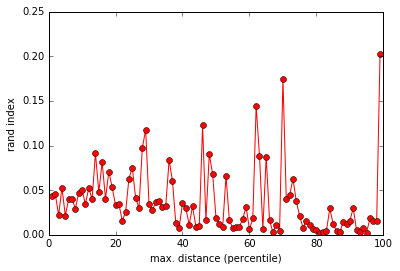

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt("/Users/telmo/projects/ghostborders/paris_dist_sequence.csv", names=['per', 'dist'], skip_header=0, delimiter=',')
#plt.figure(figsize=(15, 10))
plt.plot(data['per'], data['dist'], 'ro-')
plt.xlabel('max. distance (percentile)')
plt.ylabel('rand index')
plt.show()

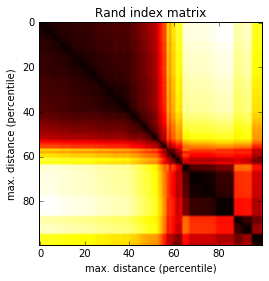

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/ukraine/ukraine_dist_matrix.csv", skip_header=0, delimiter=',')
plt.imshow(data, cmap='hot')
plt.title('Rand index matrix')
plt.xlabel('max. distance (percentile)')
plt.ylabel('max. distance (percentile)')
plt.show()

In [45]:
window = 10

def mean_dist(a, b):
    count = 0.0
    dist = 0.0
    for i in range(a, b):
        for j in range(a, i):
            count += 1.0
            dist += data[i][j]
    if count == 0.0:
        return 0.0
    dist /= count
    return dist

def mean_mean_dist(breaks):
    sum = 0.0
    start = 0
    for b in breaks:
        sum += mean_dist(start, b) * (b - start)
        start = b
    heur = sum / 100.0
    sum += mean_dist(start, 100) * (100 - start)
    mean_mean = sum / 100.0
    return mean_mean, heur

def valid_break(breaks, brk):
    for i in breaks:
        if abs(i - brk) < window:
            return False
    return True

breaks = []
best_best_score = 9999999.9

while True:
    best = []
    best_score = 999999.9
    for i in range(100):
        if valid_break(breaks, i):
            new_breaks = breaks[:]
            new_breaks.append(i)
            score, heur = mean_mean_dist(new_breaks)
            if score < best_score:
                best_score = score
                best = new_breaks
    breaks = best
    if best_score < best_best_score:
        print(best_score)
        print(best)
        best_best_score = best_score
    else:
        break

0.0139118387599
[57]
0.0109612502569
[57, 87]
0.0105804761932
[57, 87, 97]


In [15]:
BASE_DIR = '/Users/telmo/Dropbox/phantomgrenzen/scales-metrics'

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def read_file(region, metric, smooth):
    file_name = '%s-per-%s' % (region, metric)
    if smooth:
        file_name = '%s-smooth' % file_name
    file_path = '%s/%s.csv' % (BASE_DIR, file_name)
    data = np.genfromtxt(file_path, names=['per', 'dist', 'metric'], skip_header=1, delimiter=',')
    return data


def charts(region):
    plt.figure(figsize=(15, 10))
    
    data = read_file(region, 'count', False)
    plt.subplot(2, 3, 1)
    plt.plot(data['per'], data['metric'], 'ro-')
    plt.title('# communities')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('count')

    data = read_file(region, 'entropy', False)
    plt.subplot(2, 3, 2)
    plt.plot(data['per'], data['metric'], 'go-')
    plt.title('Entropy')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('entropy')

    data = read_file(region, 'herfindahl', False)
    plt.subplot(2, 3, 3)
    plt.plot(data['per'], data['metric'], 'bo-')
    plt.title('Herfindahl')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('Herfindahl')

    data = read_file(region, 'count', True)
    plt.subplot(2, 3, 4)
    plt.plot(data['per'], data['metric'], 'ro-')
    plt.title('# communities (smooth)')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('count')

    data = read_file(region, 'entropy', True)
    plt.subplot(2, 3, 5)
    plt.plot(data['per'], data['metric'], 'go-')
    plt.title('Entropy (smooth)')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('entropy')

    data = read_file(region, 'herfindahl', True)
    plt.subplot(2, 3, 6)
    plt.plot(data['per'], data['metric'], 'bo-')
    plt.title('Herfindahl (smooth)')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('Herfindahl')
    
    plt.show()


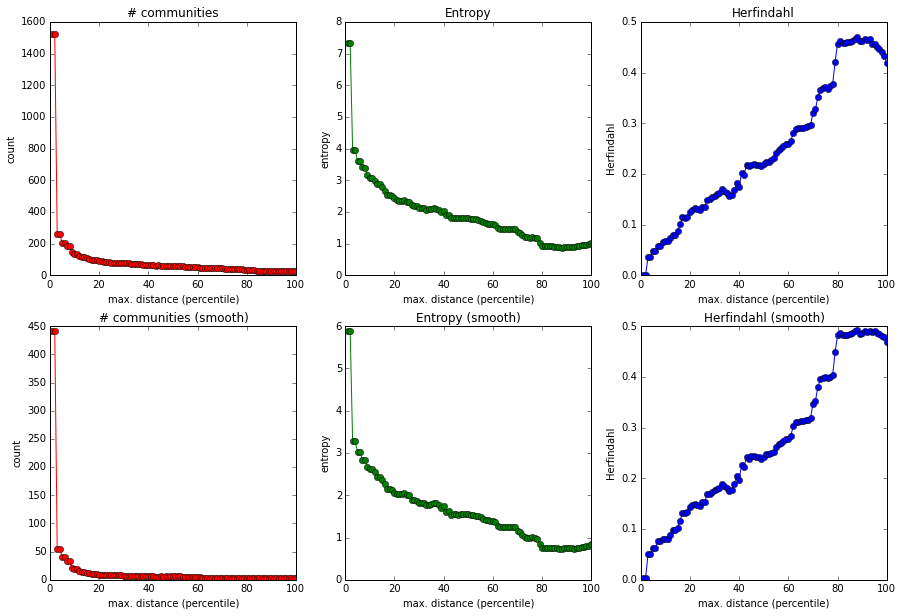

In [17]:
charts('paris')

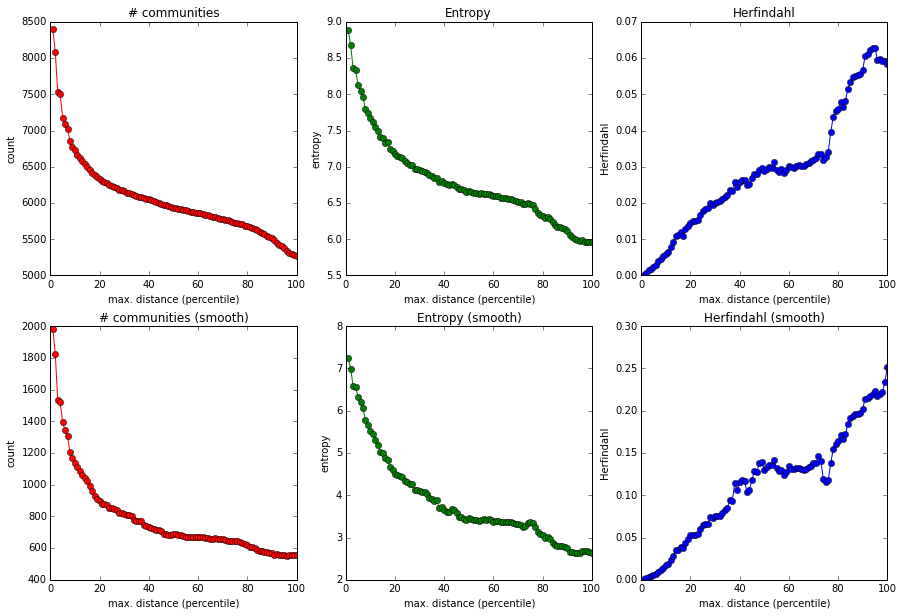

In [16]:
charts('berlin')

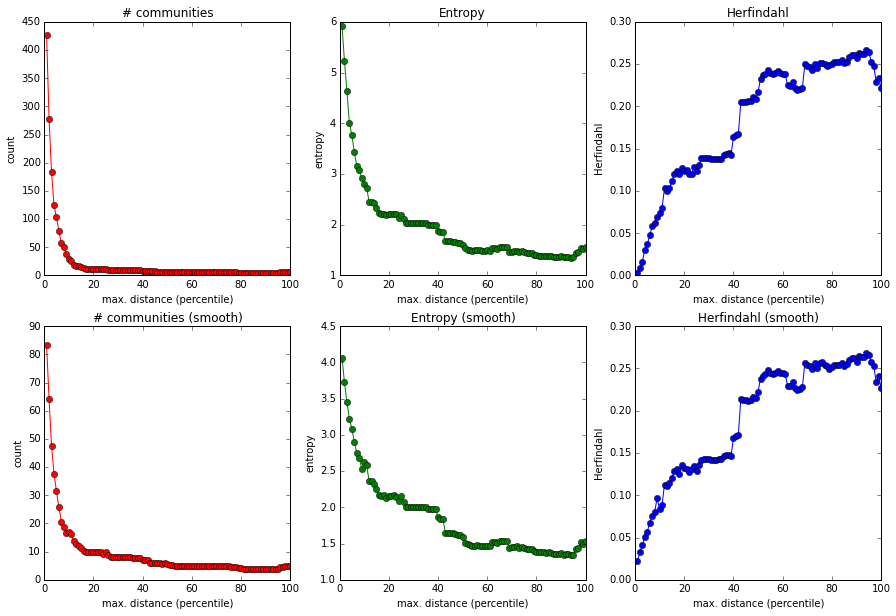

In [18]:
charts('belgium')

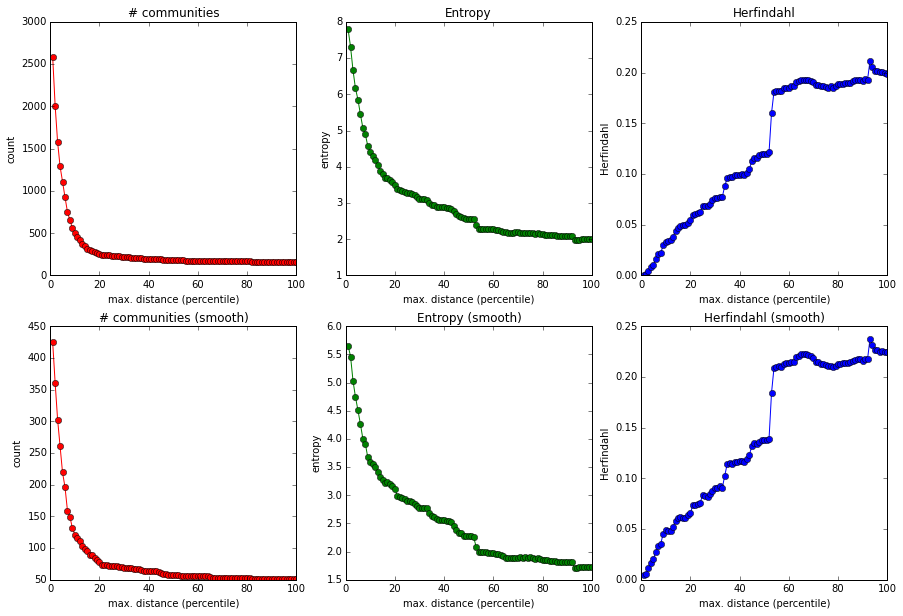

In [23]:
charts('belgium2')

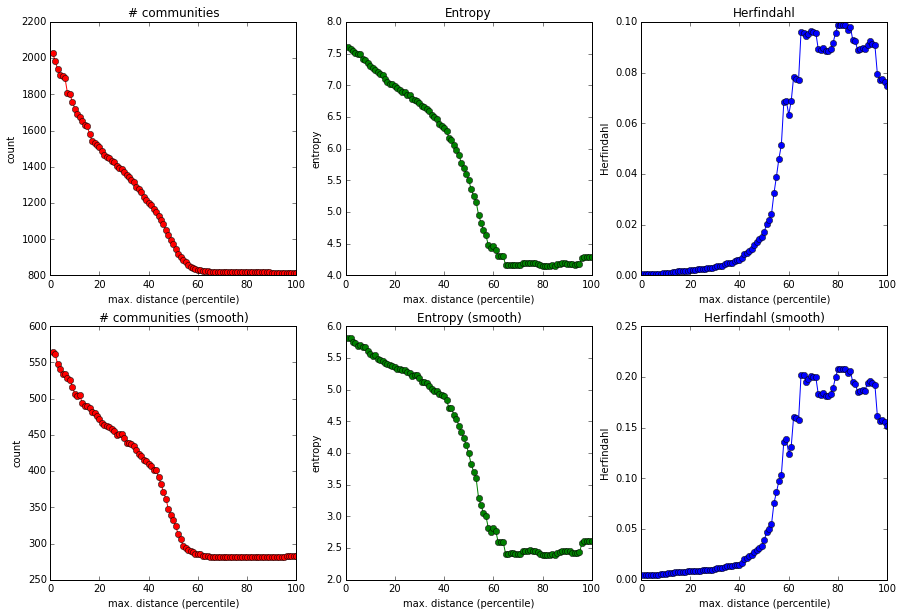

In [19]:
charts('ukraine')

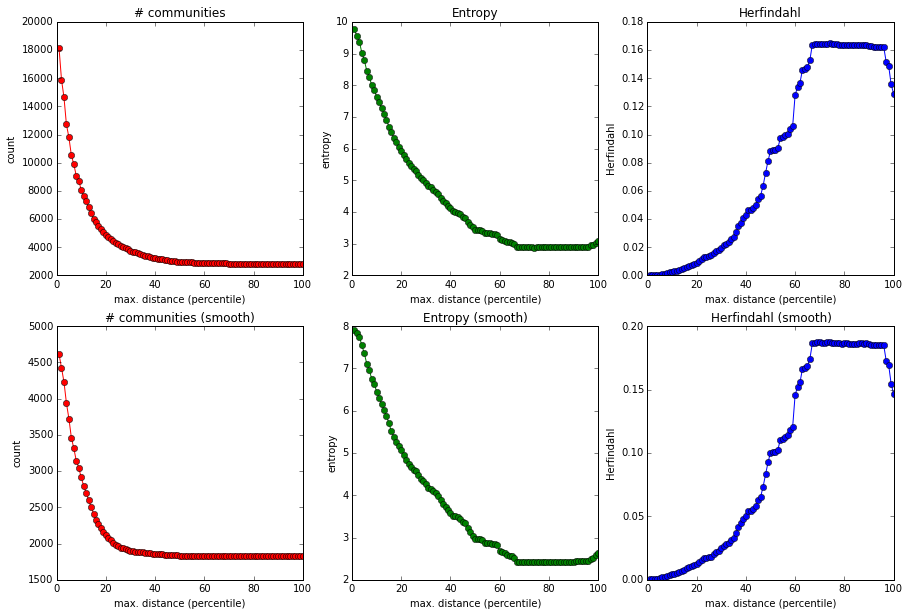

In [20]:
charts('poland')

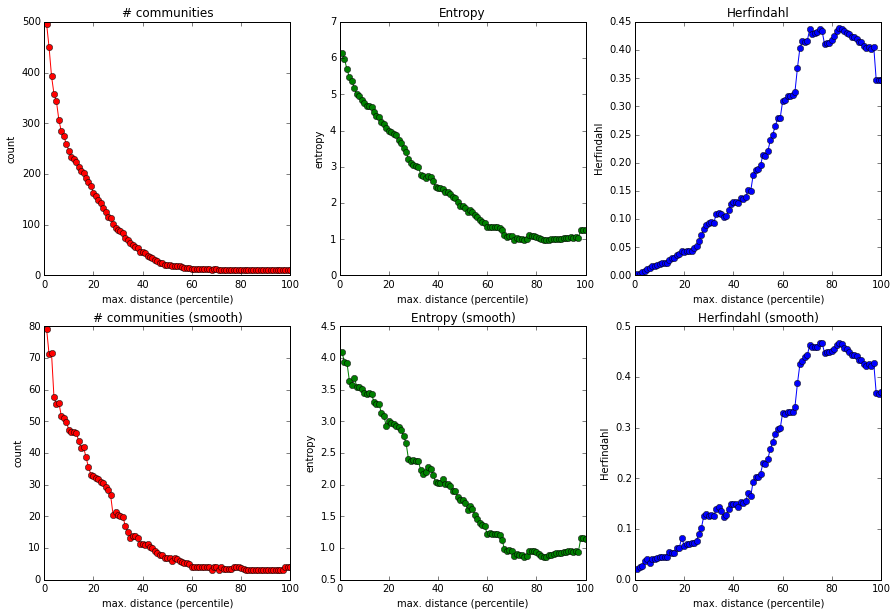

In [21]:
charts('portugal')

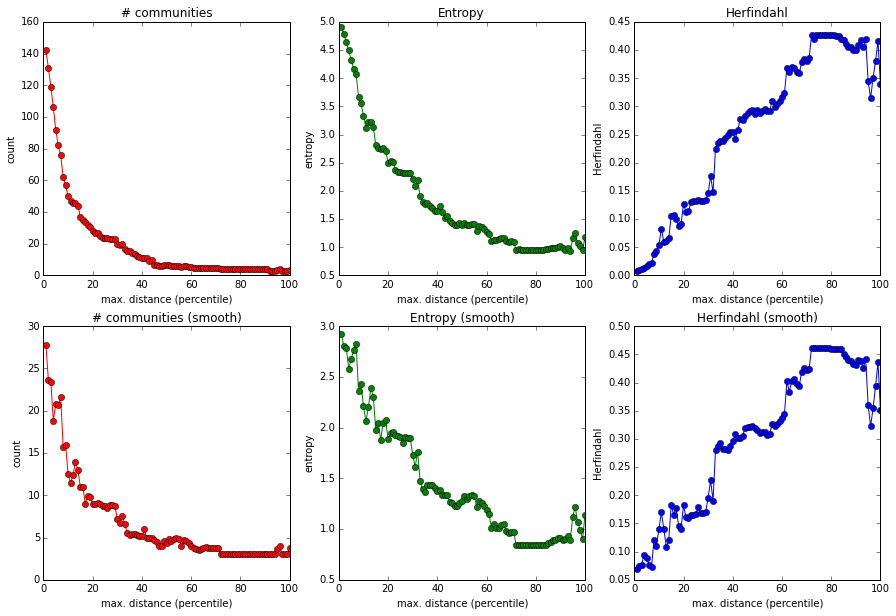

In [22]:
charts('israel')

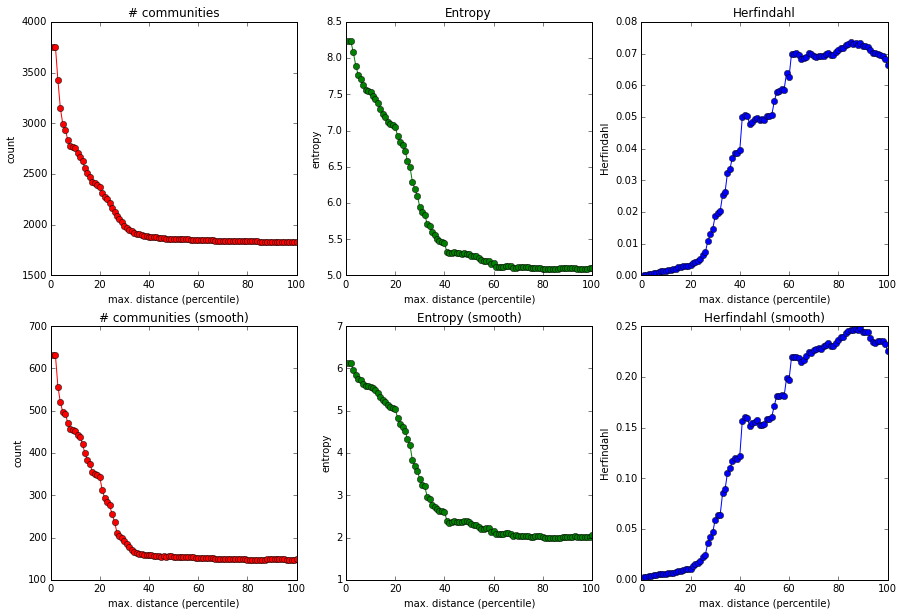

In [24]:
charts('romania')

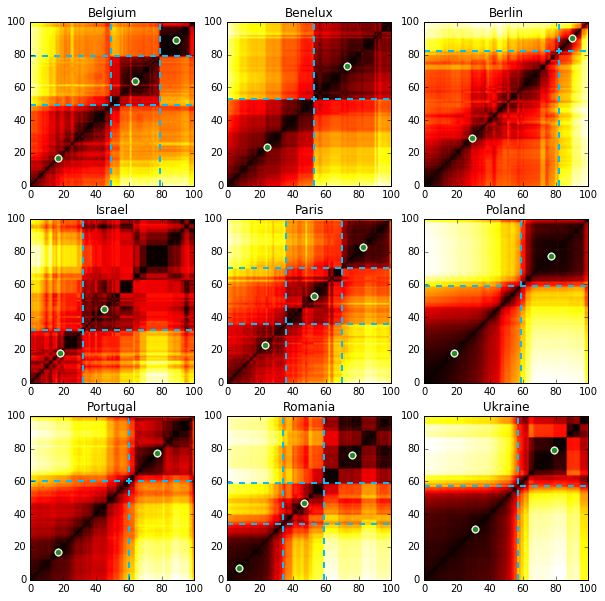

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def partition(plt, pos):
    plt.axvline(pos, color='deepskyblue', ls='dashed', lw=2)
    plt.axhline(pos, color='deepskyblue', ls='dashed', lw=2)

    
def scale(plt, pos):
    plt.plot(pos - 1, pos - 1, 'b.', markersize=15, c='white')
    plt.plot(pos - 1, pos - 1, 'b.', markersize=10, c='forestgreen')

    
plt.figure(figsize=(10, 10))
    
data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/belgium/belgium_dist_matrix.csv", skip_header=0, delimiter=',')
plt.subplot(3, 3, 1)
plt.imshow(data, cmap='hot')
partition(plt, 49)
partition(plt, 79)
scale(plt, 18)
scale(plt, 65)
scale(plt, 90)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Belgium')

data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/belgium2/belgium2_dist_matrix.csv", skip_header=0, delimiter=',')
plt.subplot(3, 3, 2)
plt.imshow(data, cmap='hot')
partition(plt, 53)
scale(plt, 25)
scale(plt, 74)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Benelux')

data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/berlin/berlin_dist_matrix.csv", skip_header=0, delimiter=',')
plt.subplot(3, 3, 3)
plt.imshow(data, cmap='hot')
partition(plt, 82)
scale(plt, 30)
scale(plt, 91)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Berlin')

data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/israel/israel_dist_matrix.csv", skip_header=0, delimiter=',')
plt.subplot(3, 3, 4)
plt.imshow(data, cmap='hot')
partition(plt, 32)
scale(plt, 19)
scale(plt, 46)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Israel')

data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/paris/paris_dist_matrix.csv", skip_header=0, delimiter=',')
plt.subplot(3, 3, 5)
plt.imshow(data, cmap='hot')
partition(plt, 36)
partition(plt, 70)
scale(plt, 24)
scale(plt, 54)
scale(plt, 84)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Paris')

data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/poland/poland_dist_matrix.csv", skip_header=0, delimiter=',')
plt.subplot(3, 3, 6)
plt.imshow(data, cmap='hot')
partition(plt, 59)
scale(plt, 19)
scale(plt, 78)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Poland')

data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/portugal/portugal_dist_matrix.csv", skip_header=0, delimiter=',')
plt.subplot(3, 3, 7)
plt.imshow(data, cmap='hot')
partition(plt, 60)
scale(plt, 18)
scale(plt, 78)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Portugal')

data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/romania/romania_dist_matrix.csv", skip_header=0, delimiter=',')
plt.subplot(3, 3, 8)
plt.imshow(data, cmap='hot')
partition(plt, 34)
partition(plt, 59)
scale(plt, 8)
scale(plt, 48)
scale(plt, 77)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Romania')

data = np.genfromtxt("/Users/telmo/projects/ghostborders/results/ukraine/ukraine_dist_matrix.csv", skip_header=0, delimiter=',')
plt.subplot(3, 3, 9)
plt.imshow(data, cmap='hot')
partition(plt, 57)
scale(plt, 32)
scale(plt, 80)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Ukraine')

plt.show()